## Template Analysis

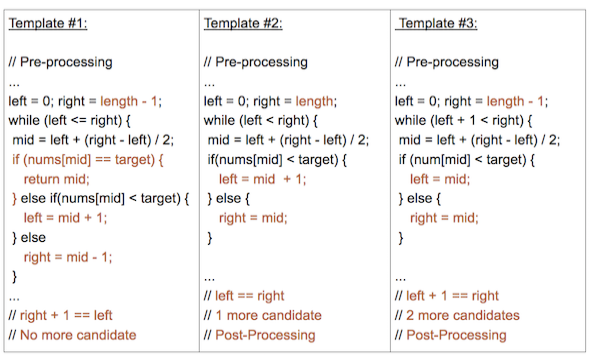

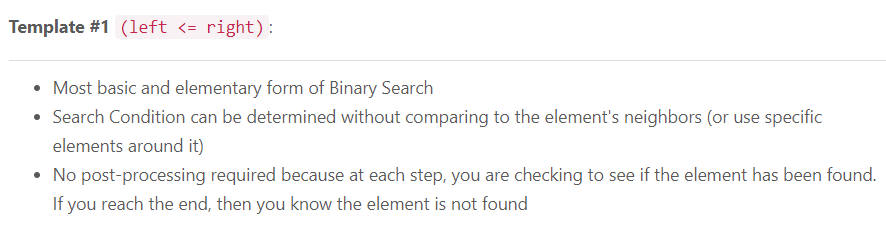

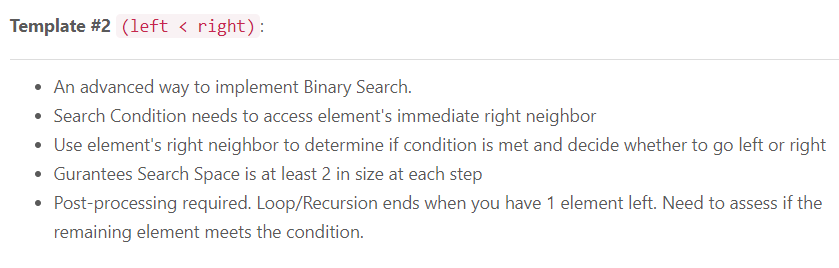

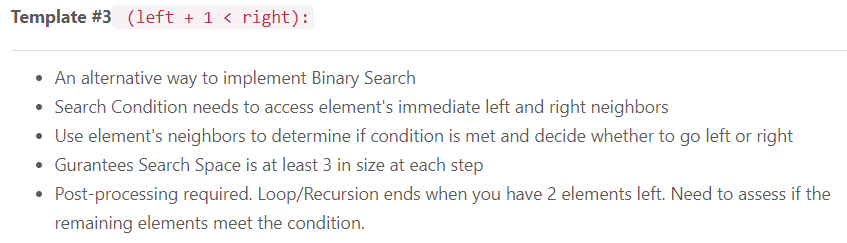

### Closest Binary Search Tree Value

https://leetcode.com/explore/learn/card/binary-search/136/template-analysis/1028/

Given the root of a binary search tree and a target value, return the value in the BST that is closest to the target.


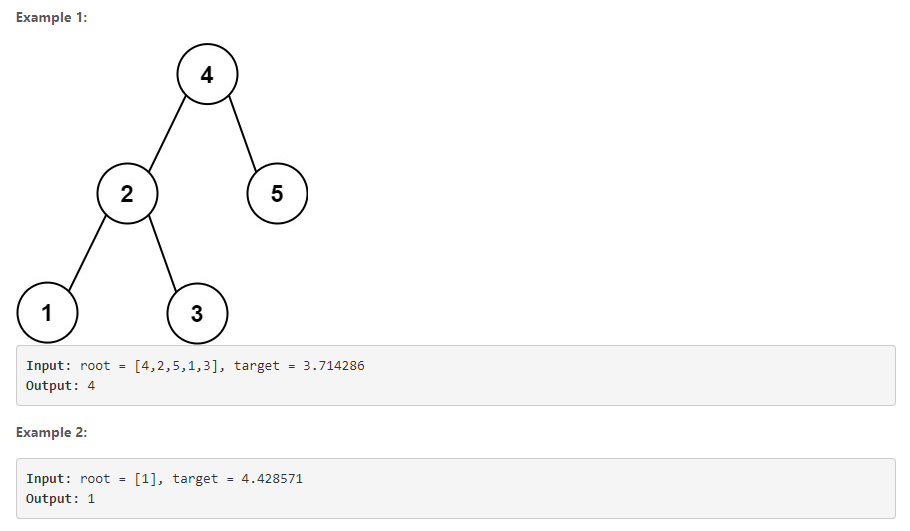

##### Accepted v1
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    int closestValue(TreeNode* root, double target) {
        if(target == root->val){
            return root->val;
        }
        
        TreeNode* base = root;
        TreeNode* cur = root;
        while(cur and (cur->left or cur->right)){
//             cout<<base->val<<" base->val\n";
//             cout<<cur->val<<" cur->val\n";
//             cout<<"\n";
            
            
            
            if(target < cur->val){
                if (abs(target - base->val) > abs(target - cur->val)){
                    base = cur;
                }
                cur = cur->left;
                
            }else if(target > cur->val){
                if (abs(target - base->val) > abs(target - cur->val)){
                    base = cur;
                }
                cur = cur->right;
            }else{
                return cur->val;
            }
        }
        
        
        if(not cur){
            return base->val;
        }
        // cout<<" tata\n";
        
        
        if (abs(target - base->val) > abs(target - cur->val)){
                return cur->val;
            }else{
                return base->val;
        }

  
    }
};

```

### Solutions
https://leetcode.com/problems/closest-binary-search-tree-value/solution/

##### Approach 1: Recursive Inorder + Linear search, O(N) time
```cpp
class Solution {
  public void inorder(TreeNode root, List<Integer> nums) {
    if (root == null) return;
    inorder(root.left, nums);
    nums.add(root.val);
    inorder(root.right, nums);
  }

  public int closestValue(TreeNode root, double target) {
    List<Integer> nums = new ArrayList();
    inorder(root, nums);
    return Collections.min(nums, new Comparator<Integer>() {
      @Override
      public int compare(Integer o1, Integer o2) {
        return Math.abs(o1 - target) < Math.abs(o2 - target) ? -1 : 1;
      }
    });
  }
}
```

##### Approach 2: Iterative Inorder, O(k) time
```java
class Solution {
  public int closestValue(TreeNode root, double target) {
    LinkedList<TreeNode> stack = new LinkedList();
    long pred = Long.MIN_VALUE;

    while (!stack.isEmpty() || root != null) {
      while (root != null) {
        stack.add(root);
        root = root.left;
      }
      root = stack.removeLast();

      if (pred <= target && target < root.val)
        return Math.abs(pred - target) < Math.abs(root.val - target) ? (int)pred : root.val;

      pred = root.val;
      root = root.right;
    }
    return (int)pred;
  }
}
```

##### Approach 3: Binary Search, O(H) time
```java

class Solution {
  public int closestValue(TreeNode root, double target) {
    int val, closest = root.val;
    while (root != null) {
      val = root.val;
      closest = Math.abs(val - target) < Math.abs(closest - target) ? val : closest;
      root =  target < root.val ? root.left : root.right;
    }
    return closest;
  }
}

```

## Search in a Sorted Array of Unknown Size

https://leetcode.com/explore/learn/card/binary-search/136/template-analysis/1061/

This is an interactive problem.

You have a sorted array of unique elements and an unknown size. You do not have an access to the array but you can use the ArrayReader interface to access it. You can call ArrayReader.get(i) that:

returns the value at the ith index (0-indexed) of the secret array (i.e., secret[i]), or
returns 231 - 1 if the i is out of the boundary of the array.
You are also given an integer target.

Return the index k of the hidden array where secret[k] == target or return -1 otherwise.

You must write an algorithm with O(log n) runtime complexity.

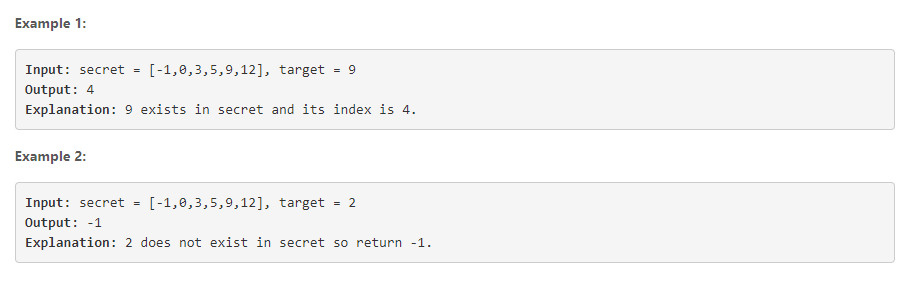

##### Accepted v1
```cpp

/**
 * // This is the ArrayReader's API interface.
 * // You should not implement it, or speculate about its implementation
 * class ArrayReader {
 *   public:
 *     int get(int index);
 * };
 */

class Solution {
public:
    
    int find_length(const ArrayReader& reader, int target){
        int right_p = 0;
        int right_value = reader.get(right_p);
        int step = 0;
            
                
        while(right_value==2147483647 or right_value<target){
            
            if(right_value==2147483647 and reader.get(right_p-1)!=2147483647){
                return right_p-1;
            }
            
            
            if(right_value!=2147483647){
                if(step==0){
                    step += 1;
                }else{
                    step = step * 2;
                }
                right_p = right_p + step;
                right_value = reader.get(right_p);
            }else{
                right_p = right_p - step;
                step = step / 2;
                right_p = right_p + step;
                right_value = reader.get(right_p);
            }
        }
        
        return right_p;
        
        
        
    }
    
    int binarySearch(const ArrayReader& reader, int target, int start, int end){
        if(end < start)
            return -1;

        int left = start, right = end;
        while(left <= right){
            // Prevent (left + right) overflow
            int mid = left + (right - left) / 2;
            if(reader.get(mid) == target){ return mid; }
            else if(reader.get(mid) < target) { left = mid + 1; }
            else { right = mid - 1; }
        }

        // End Condition: left > right
        return -1;
    }
    
    int search(const ArrayReader& reader, int target) {
        // cout<<find_length(reader, target);
        int right_p = find_length(reader, target);
        return binarySearch(reader, target, 0, right_p);
    }
};
```


### Solutions
https://leetcode.com/problems/search-in-a-sorted-array-of-unknown-size/solution/

##### Approach 1: Binary Search
```cpp
class ArrayReader;

class Solution {
  public:
  int search(const ArrayReader& reader, int target) {
    if (reader.get(0) == target) return 0;

    // search boundaries
    int left = 0, right = 1;
    while (reader.get(right) < target) {
      left = right;
      right <<= 1;
    }

    // binary search
    int pivot, num;
    while (left <= right) {
      pivot = left + ((right - left) >> 1);
      num = reader.get(pivot);

      if (num == target) return pivot;
      if (num > target) right = pivot - 1;
      else left = pivot + 1;
    }

    // there is no target element
    return -1;
  }
};

```